In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *
from scipy.signal.windows import dpss
import sys

n_external = 3000

zmin = 2.4
zmax = 3.4

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

# get CMB lensing component
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) #[Mpc]^2


# beam=1.4, noise=7
from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)
with open('LIMxCMBL/N0.npy', 'rb') as f:
    N0 = np.load(f)
    
f_N0 = interp1d(x = N0_ells, y = N0)


# if no high pass IKappa
from  LIMxCMBL.kernels import *
f_Kkappa = get_f_Kkappa()


f_KLIM   = interp1d(x=chis, y = KI_CO, bounds_error = False, fill_value=0)
f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)

In [2]:
oup_fname = '/scratch/users/delon/LIMxCMBL/I_auto/I_auto_n_ext_%d_zmin_%.1f_zmax_%.1f.npy'%(n_external, zmin, zmax)
print(oup_fname)

/scratch/users/delon/LIMxCMBL/I_auto/I_auto_n_ext_3000_zmin_2.4_zmax_3.4.npy


In [3]:
external_chis = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_external)

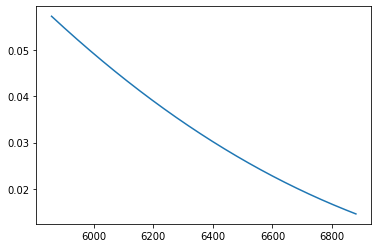

In [4]:
import matplotlib.pyplot as plt
plt.plot(external_chis, f_KLIM(external_chis))

In [5]:
from scipy.interpolate import LinearNDInterpolator


In [6]:
tmp_chibs = []
tmp_log_deltas = []
tmp_fnctn = []
for i in range(len(chibs)):
    for j in range(len(deltas)):
        tmp_chibs += [chibs[i]]
        tmp_log_deltas += [np.log10(deltas[j])]
        tmp_fnctn += [inner_dkparp_integral[:,i,j]]
        
new_f_inner_integral = LinearNDInterpolator(list(zip(tmp_chibs, tmp_log_deltas)), tmp_fnctn)

In [7]:
X, Y = np.meshgrid(chibs, np.log10(deltas))
new_f_inner_integral(X, Y).shape

(128, 256, 100)

In [8]:
def f_unfiltered_auto(chi, chip):
    ret = 4/(chi + chip)**2
    ret *= f_KLIM_windowed(chi) * f_KLIM_windowed(chip)
    _delta = np.abs((chi - chip) / (chi + chip))
    
    ### bound delta
    _delta = np.where(_delta > 0.7, 0.7, _delta)
    _delta = np.where(_delta < 1e-6, 1e-6, _delta)
    
    _chib  = (chi + chip) / 2
    X, Y = np.meshgrid(_chib, np.log10(_delta))
    return ret * new_f_inner_integral(X,Y)

In [9]:
from scipy.integrate import quad_vec

In [10]:
unfiltered_auto = np.zeros((100, n_external, n_external))
for i in trange(n_external):
    for j in range(i, n_external):
        unfiltered_auto[:, i, j] = unfiltered_auto[:, j, i] = f_unfiltered_auto(external_chis[i], 
                                                                                external_chis[j])

100%|██████████| 3000/3000 [10:39<00:00,  4.69it/s] 


In [11]:
import matplotlib.pyplot as plt

In [12]:
np.save(oup_fname, unfiltered_auto)

1.3629246864182438e-07 1.3629246864182438e-07


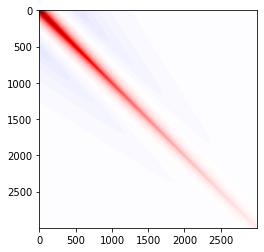

1.3640971998450274e-07 1.3640971998450274e-07


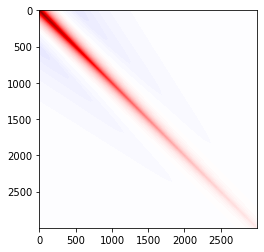

1.3653496177891584e-07 1.3653496177891584e-07


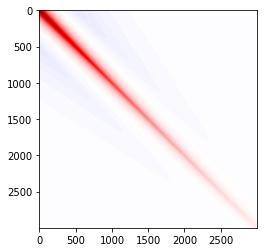

1.3666836158885538e-07 1.3666836158885538e-07


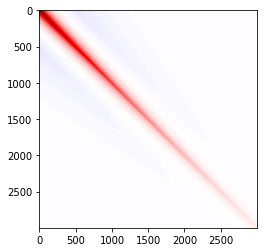

1.3681000969121464e-07 1.3681000969121464e-07


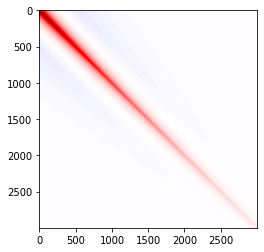

1.3695990189482375e-07 1.3695990189482375e-07


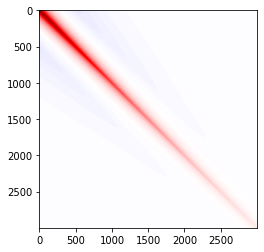

1.3711791768068366e-07 1.3711791768068366e-07


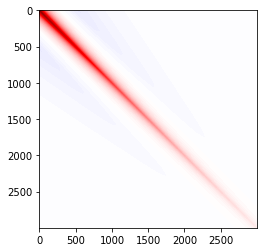

1.3728379427429563e-07 1.3728379427429563e-07


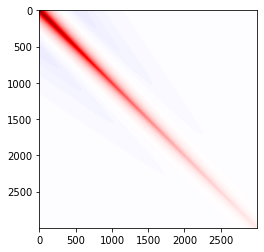

1.3745709383813701e-07 1.3745709383813701e-07


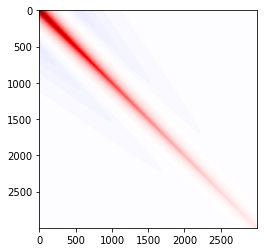

1.376371740565734e-07 1.376371740565734e-07


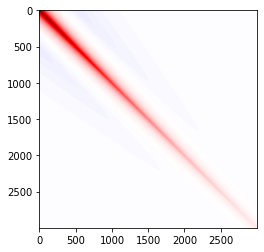

1.3782315363297253e-07 1.3782315363297253e-07


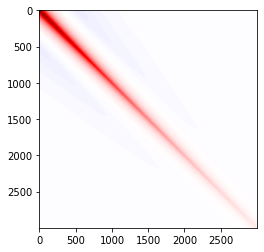

1.3801387085223747e-07 1.3801387085223747e-07


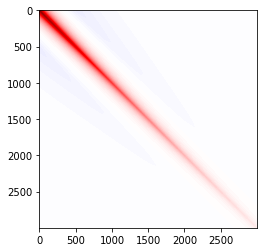

1.3820783992933852e-07 1.3820783992933852e-07


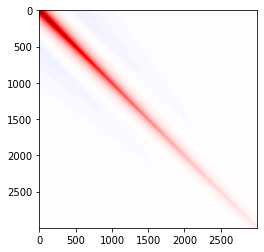

1.3840320198082811e-07 1.3840320198082811e-07


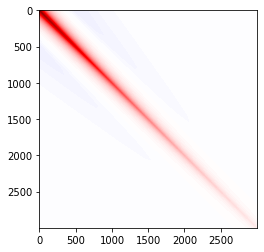

1.3859767248318326e-07 1.3859767248318326e-07


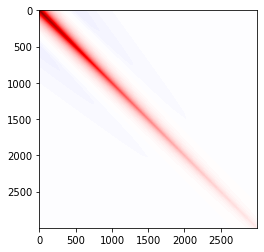

1.3878848589195767e-07 1.3878848589195767e-07


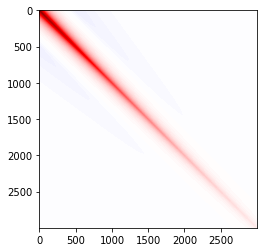

1.3897233558331737e-07 1.3897233558331737e-07


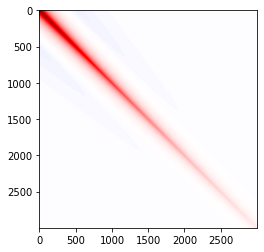

1.391453115058792e-07 1.391453115058792e-07


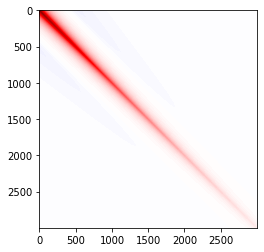

1.3930283894031984e-07 1.3930283894031984e-07


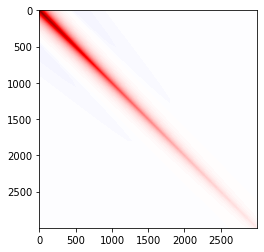

1.3943961365834101e-07 1.3943961365834101e-07


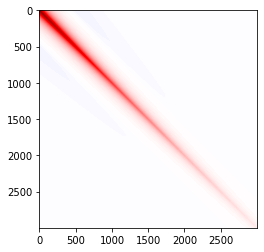

1.395495436746006e-07 1.395495436746006e-07


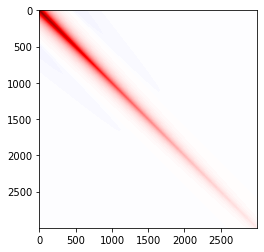

1.396256953140199e-07 1.396256953140199e-07


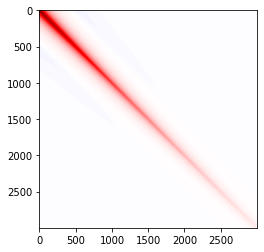

1.3966024998189864e-07 1.3966024998189864e-07


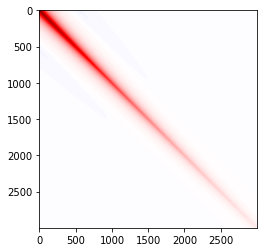

1.396444750038258e-07 1.396444750038258e-07


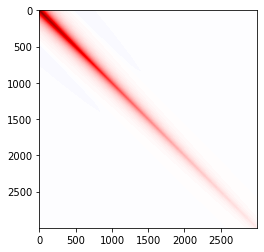

1.3956871952447434e-07 1.3956871952447434e-07


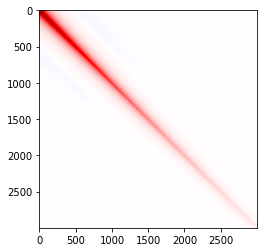

1.3942243683684627e-07 1.3942243683684627e-07


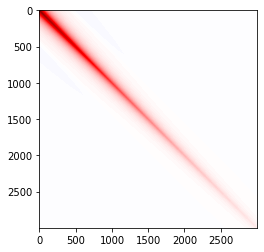

1.3919425000625854e-07 1.3919425000625854e-07


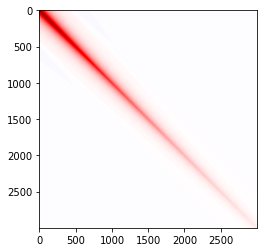

1.3887206401758114e-07 1.3887206401758114e-07


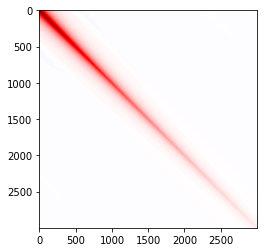

1.3844324724318397e-07 1.3844324724318397e-07


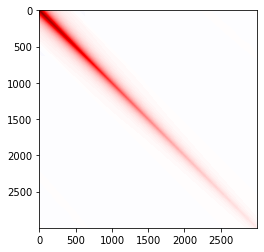

1.3789488528670113e-07 1.3789488528670113e-07


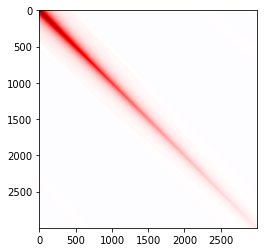

1.3721412169703052e-07 1.3721412169703052e-07


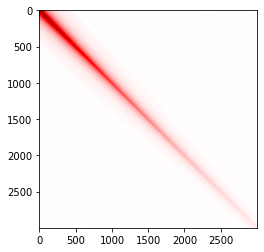

1.3638860693535457e-07 1.3638860693535457e-07


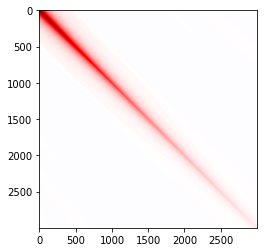

1.354070436554508e-07 1.354070436554508e-07


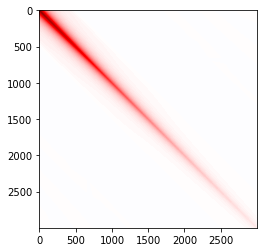

1.3425984803540083e-07 1.3425984803540083e-07


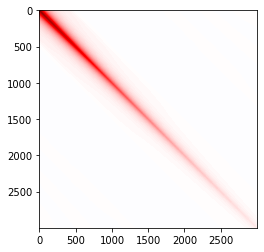

1.329398920892998e-07 1.329398920892998e-07


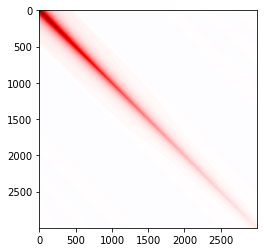

1.314433304604652e-07 1.314433304604652e-07


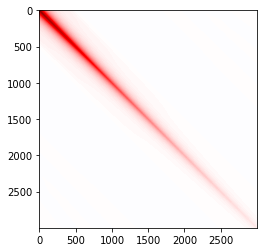

1.297704252661175e-07 1.297704252661175e-07


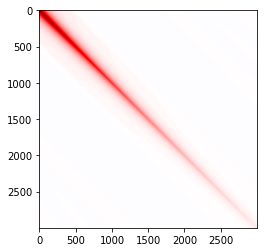

1.2792632778601174e-07 1.2792632778601174e-07


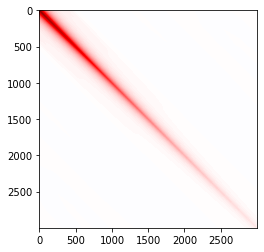

1.259216932021439e-07 1.259216932021439e-07


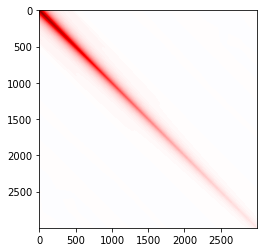

1.2377298317594663e-07 1.2377298317594663e-07


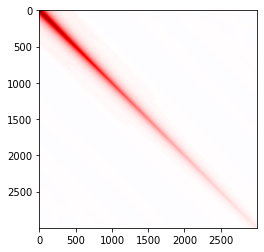

1.2150229353855297e-07 1.2150229353855297e-07


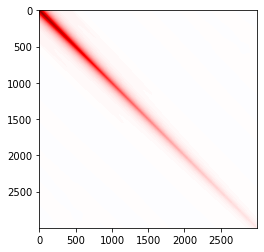

1.191364693231863e-07 1.191364693231863e-07


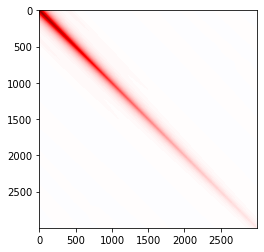

1.1670521292052906e-07 1.1670521292052906e-07


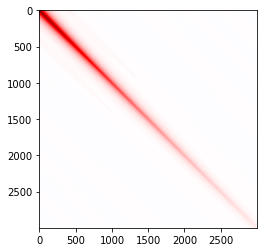

1.1423622825471968e-07 1.1423622825471968e-07


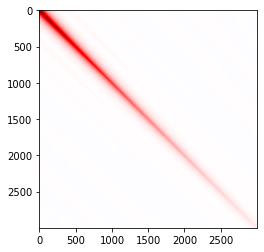

1.1176180086346541e-07 1.1176180086346541e-07


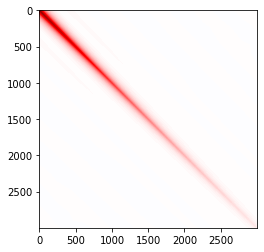

1.0931222757529233e-07 1.0931222757529233e-07


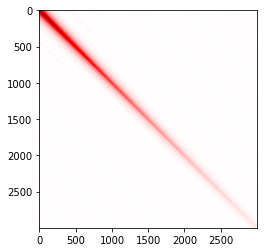

1.068986173325378e-07 1.068986173325378e-07


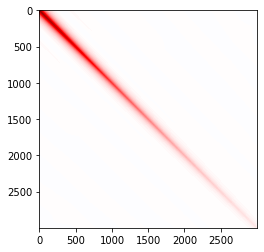

1.0451260398107764e-07 1.0451260398107764e-07


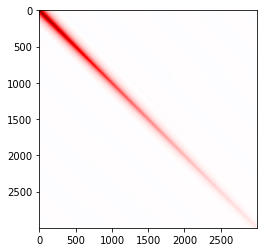

1.0212683557965901e-07 1.0212683557965901e-07


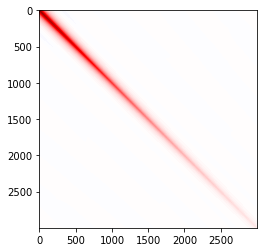

9.970027301819866e-08 9.970027301819866e-08


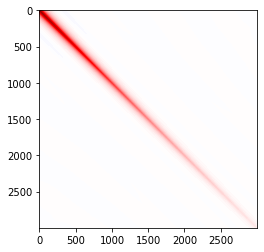

9.71889949094919e-08 9.71889949094919e-08


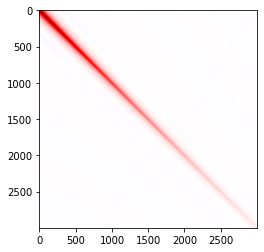

9.451378727923545e-08 9.451378727923545e-08


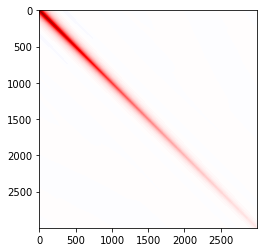

9.158756633188113e-08 9.158756633188113e-08


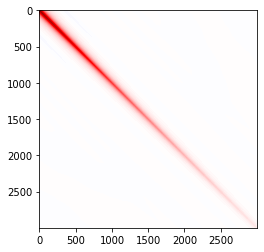

8.837739192776739e-08 8.837739192776739e-08


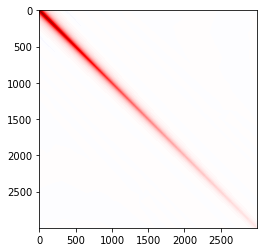

8.488898425226513e-08 8.488898425226513e-08


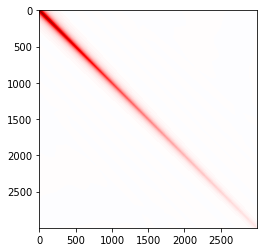

8.120079943440442e-08 8.120079943440442e-08


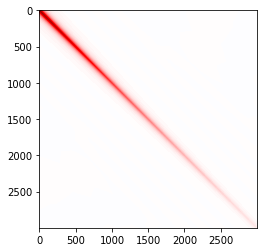

7.745530257841426e-08 7.745530257841426e-08


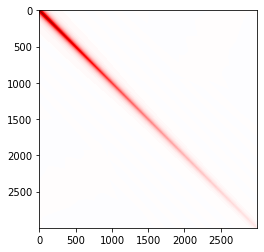

7.382449573324428e-08 7.382449573324428e-08


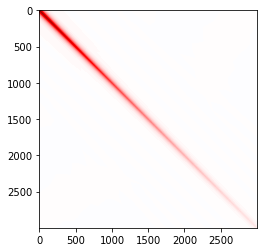

7.046561648671516e-08 7.046561648671516e-08


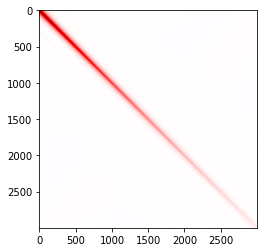

6.74655250819744e-08 6.74655250819744e-08


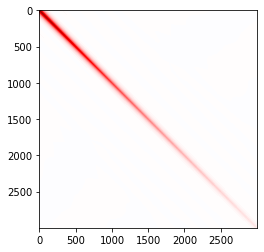

6.478259244998986e-08 6.478259244998986e-08


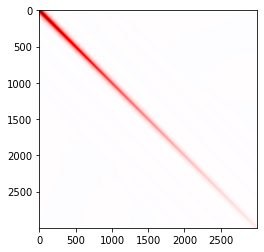

6.224278808425467e-08 6.224278808425467e-08


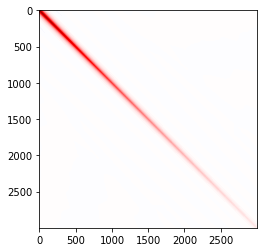

5.960551560707312e-08 5.960551560707312e-08


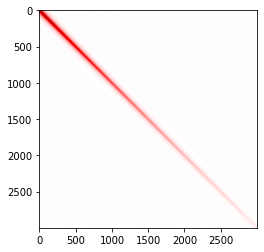

5.667207408615155e-08 5.667207408615155e-08


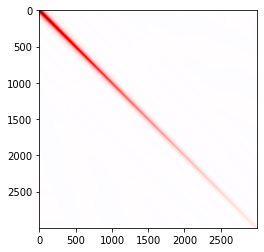

5.3459236537833296e-08 5.3459236537833296e-08


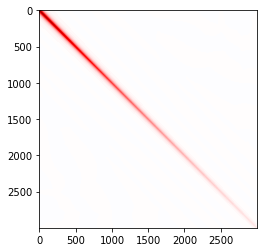

5.0244708817609104e-08 5.0244708817609104e-08


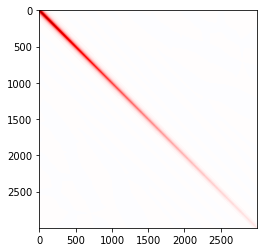

4.7340398750171295e-08 4.7340398750171295e-08


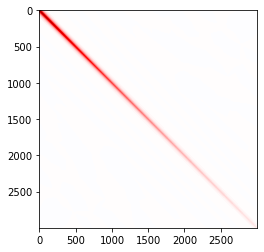

4.487731471701964e-08 4.487731471701964e-08


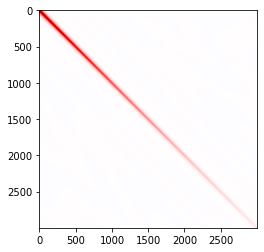

4.265799101179175e-08 4.265799101179175e-08


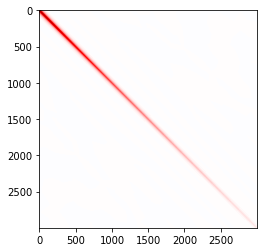

4.0339138029956716e-08 4.0339138029956716e-08


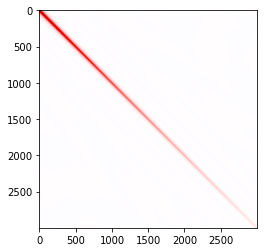

3.780676162071607e-08 3.780676162071607e-08


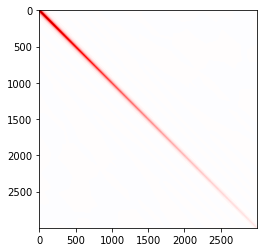

3.531805708210964e-08 3.531805708210964e-08


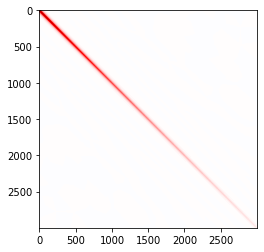

3.316055377796107e-08 3.316055377796107e-08


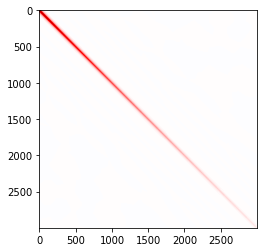

3.124055805315602e-08 3.124055805315602e-08


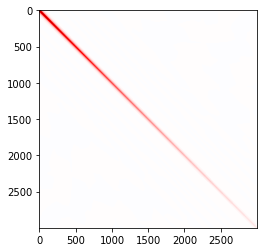

2.9268221496364972e-08 2.9268221496364972e-08


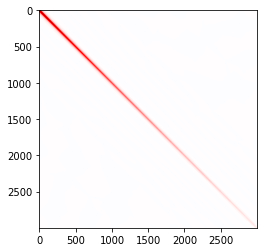

2.7262634398671015e-08 2.7262634398671015e-08


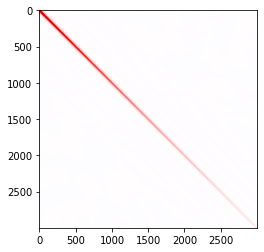

2.545978933213349e-08 2.545978933213349e-08


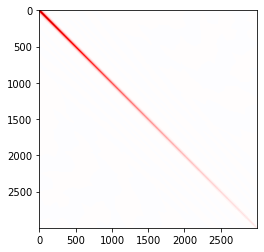

2.381526384651729e-08 2.381526384651729e-08


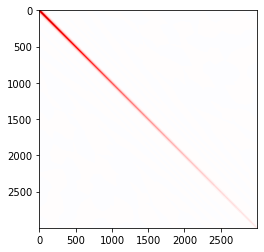

2.2168284241276543e-08 2.2168284241276543e-08


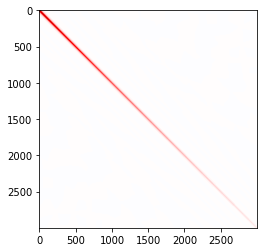

2.061420651115842e-08 2.061420651115842e-08


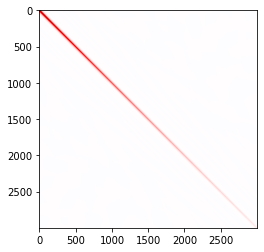

1.9193806513335838e-08 1.9193806513335838e-08


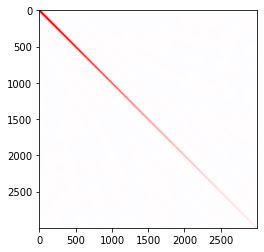

1.781812597324783e-08 1.781812597324783e-08


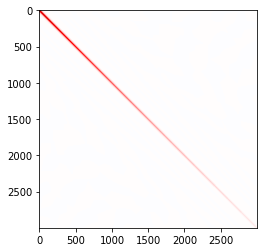

1.6533234150764293e-08 1.6533234150764293e-08


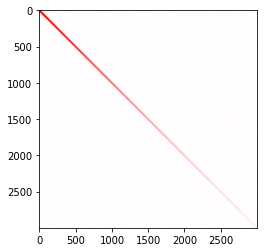

1.5331530839531223e-08 1.5331530839531223e-08


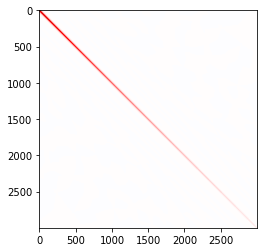

1.419510144083358e-08 1.419510144083358e-08


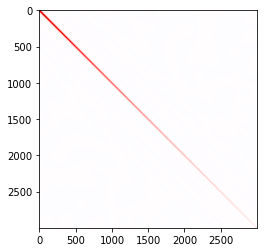

1.313717570237436e-08 1.313717570237436e-08


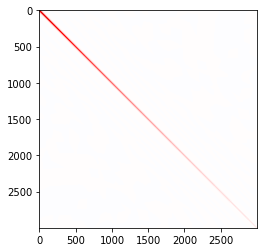

1.2142904599493565e-08 1.2142904599493565e-08


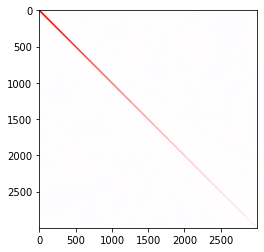

1.121613494235741e-08 1.121613494235741e-08


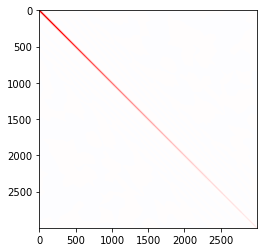

1.0350030135251976e-08 1.0350030135251976e-08


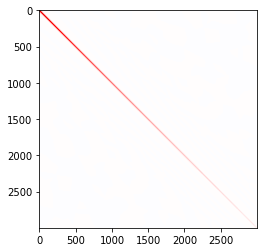

9.543455096840553e-09 9.543455096840553e-09


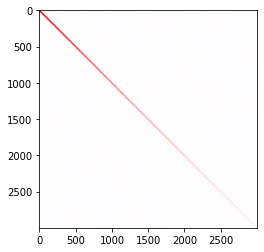

8.79189937631708e-09 8.79189937631708e-09


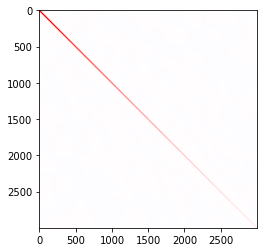

8.092876704137636e-09 8.092876704137636e-09


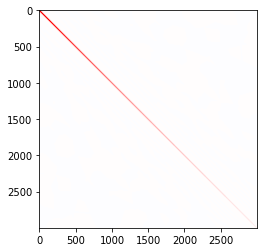

7.443746588491834e-09 7.443746588491834e-09


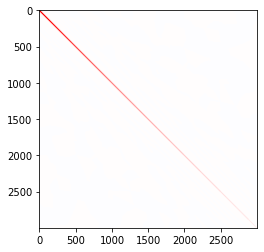

6.841648476731412e-09 6.841648476731412e-09


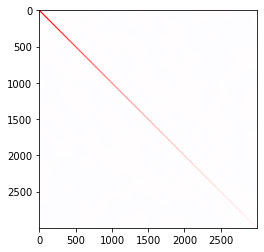

6.283660968691383e-09 6.283660968691383e-09


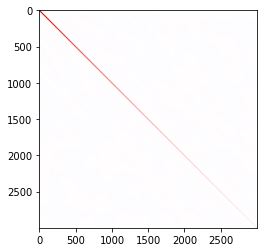

5.767007097185422e-09 5.767007097185422e-09


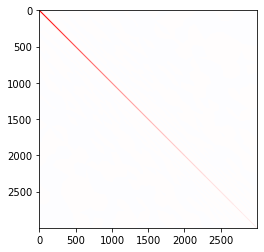

5.2890730459399125e-09 5.2890730459399125e-09


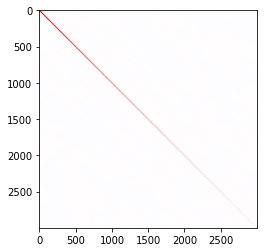

4.847400522401275e-09 4.847400522401275e-09


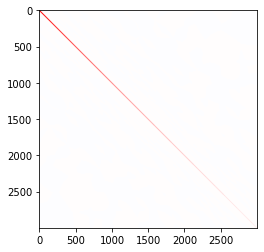

4.439639334914655e-09 4.439639334914655e-09


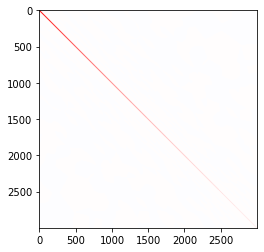

4.063537104773057e-09 4.063537104773057e-09


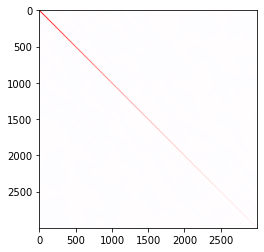

In [13]:
for ell_idx in range(len(ells)):
    vb = np.max(np.abs(unfiltered_auto[ell_idx]))
    plt.imshow(unfiltered_auto[ell_idx], vmin = -vb, vmax = vb, cmap = 'seismic')
    print(np.max(np.abs(unfiltered_auto[ell_idx])), vb)
    plt.show()